In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import 


## Implementing Naive Bayes Algorithm

In [ ]:
if USE_LESS_DATA:
    df_train = df_train[:5000]
    df_val = df_val[:1000]

In [ ]:
X_train = df_train['image_paths'].apply(read_and_crop_image).values
X_val = df_val['image_paths'].apply(read_and_crop_image).values

y_train = df_train['image_labels'].values
y_val = df_val['image_labels'].values

# https://stackoverflow.com/a/69873624
X_train = np.stack(X_train, axis=0)
X_val = np.stack(X_val, axis=0)

# Expand dim to add channel info if image has 1 channel(Colorless)
if not KEEP_COLOR:
    X_train = np.expand_dims(X_train, axis=-1)
    X_val = np.expand_dims(X_val, axis=-1)

# Delete non used variables
#del(df_train)
#del(df_val)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=MAIN_SEED)

In [ ]:
print("X_train ->",X_train.shape,
      "\ny_train ->",y_train.shape,
      "\n\nX_test ->",X_test.shape,
      "\ny_test ->",y_test.shape,
      "\n\nX_val ->",X_val.shape,
      "\ny_val ->",y_val.shape
)

X_train -> (4500, 200, 200, 1) 
y_train -> (4500,) 

X_test -> (500, 200, 200, 1) 
y_test -> (500,) 

X_val -> (1000, 200, 200, 1) 
y_val -> (1000,)


In [ ]:
# Reshape the input data to two dimensions
X_train_2d = np.reshape(X_train, (X_train.shape[0], -1))
X_test_2d = np.reshape(X_test, (X_test.shape[0], -1))

# Create and fit the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_2d, y_train)

# Make predictions on the test data
predicted = nb_model.predict(X_test_2d)

# Calculate the accuracy score
score = nb_model.score(X_test_2d, y_test)
nb_score_ = np.mean(score)

# Print the accuracy score
print('Accuracy: %.3f' % nb_score_)


Accuracy: 0.560


In [ ]:
p=precision_score(y_test, predicted)
print('precision : %.3f' % (p))

r=recall_score(y_test, predicted)
print('recall : %.3f' % (r))

f1=f1_score(y_test, predicted)
print('f1-score: %.3f' % (f1))

f1_w=f1_score(y_test, predicted, average='weighted')
print('weighted f1-score: %.3f' % (f1_w))

precision : 0.782
recall : 0.473
f1-score: 0.590
weighted f1-score: 0.568


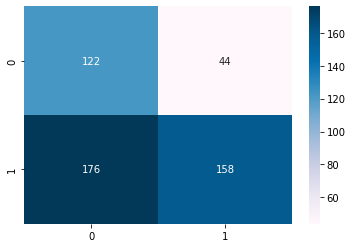

In [ ]:
cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, cmap="PuBu", annot=True, fmt='.0f')
plt.show()